In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Make a reference to the books.csv file path
csv_path = "Resources/Parkingtickets_Dec2016.csv"

# Import the books.csv file as a DataFrame
tickets_df = pd.read_csv(csv_path, encoding="utf-8")
tickets_df.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,1130A,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [4]:
# Determining the value counts of the different plate types
Plate_count = tickets_df['Plate Type'].value_counts()
Plate_count.head()

PAS    22298
COM     4163
OMT     2651
OMS      690
SRF      346
Name: Plate Type, dtype: int64

In [10]:
plate_type = tickets_df.groupby("Plate Type")
plate_type

In [11]:
#Number of Unique plate types
plate_type_ct = plate_type["Plate Type"].nunique()
# plate_type_ct
plate_type_ct.count()

37

In [12]:
#Finding out the Plate type having more number of violation codes or plate type which highly ticketed:
top_plate_types_df = pd.DataFrame(tickets_df['Plate Type'].value_counts()/len(tickets_df)).nlargest(5, columns = ['Plate Type'])
top_plate_types_df

,Plate Type
PAS,0.721315
COM,0.134668
OMT,0.085757
OMS,0.022321
SRF,0.011193


<IPython.core.display.Javascript object>


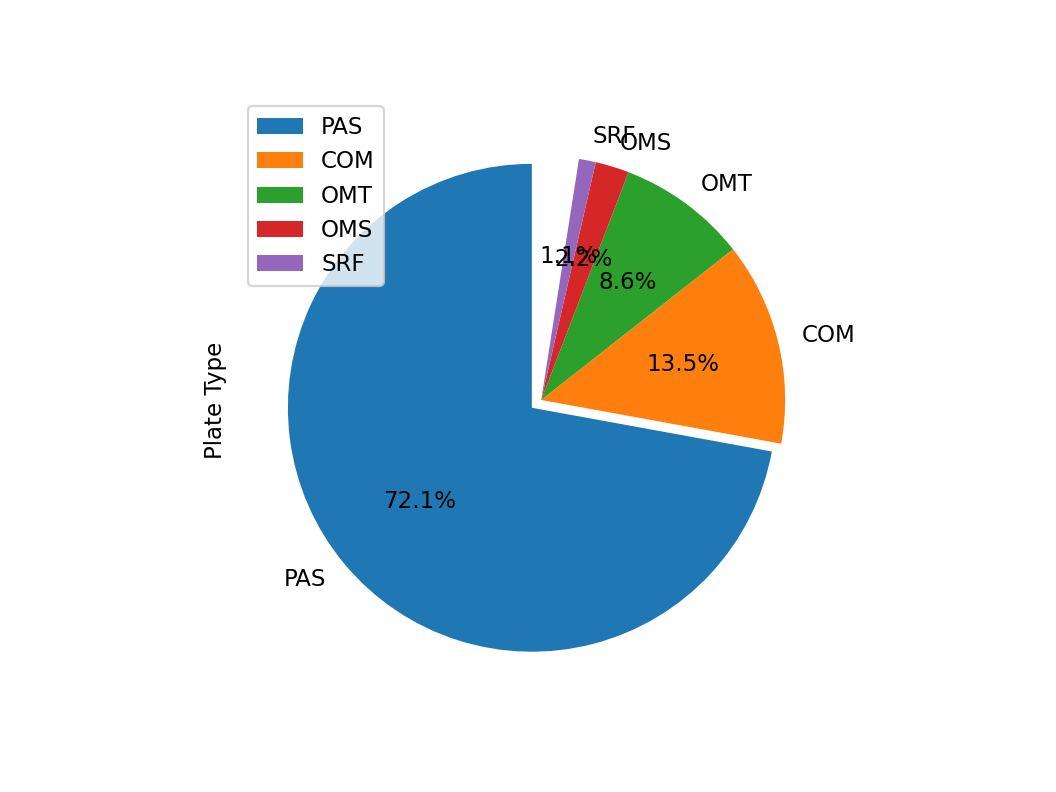

PAS plate type has maximum number of violations


In [9]:
#Ploting a pie chart with top five plate types:
explode = 0.05,0,0,0,0
plate_pie = top_plate_types_df.plot(kind="pie", subplots=True, explode=explode, autopct="%1.1f%%", startangle=90)
plt.show()

print("PAS plate type has maximum number of violations")

In [14]:
# Groupby violation code
codes_gb = tickets_df.groupby("Violation Code")
codes_gb

In [28]:
#Count of total number of violation codes:
count_codes = codes_gb["Violation Code"].count()
# count_codes
count_codes.count()

67

In [26]:
#To know the value count of unique violation code
counts = tickets_df["Violation Code"].value_counts()
counts

36    7621
21    4069
38    2909
7     1884
14    1822
      ... 
26       1
34       1
56       1
79       1
43       1
Name: Violation Code, Length: 67, dtype: int64

In [20]:
#converting to violation code to string:
tickets_df["Violation Code"] = tickets_df["Violation Code"].apply(str)
tickets_df.dtypes

Plate ID                 object
Registration State       object
Plate Type               object
Issue Date               object
Violation Code           object
Vehicle Body Type        object
Vehicle Make             object
Violation Time           object
Violation County         object
From Hours In Effect     object
To Hours In Effect       object
Vehicle Color            object
Vehicle Year              int64
Meter Number             object
Violation Post Code      object
Violation Description    object
dtype: object

In [21]:
# Determining the top 10 violation codes observed for most of the plate types:
top_counts = pd.DataFrame(tickets_df['Violation Code'].value_counts()).nlargest(10, columns = ['Violation Code'])
top_counts

,Violation Code
36,7621
21,4069
38,2909
7,1884
14,1822
37,1653
71,1474
20,1345
46,1281
40,1210


<IPython.core.display.Javascript object>


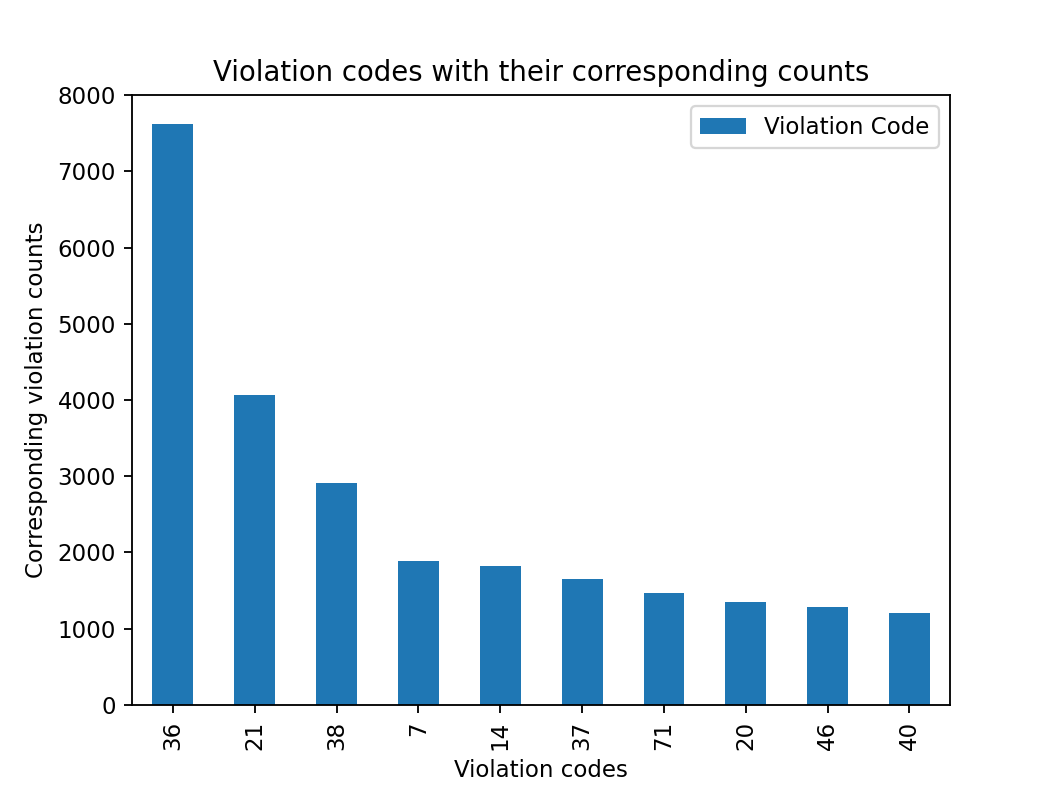

VC 36 -Exceeding the posted speed limit in or near a designated school zone
--------------
VC 21 -No parking where parking is not allowed by sign, street marking or traffic control device.
--------------
VC 38- Parking Meter-Failing to show a receipt or tag in the windshield.
---------------
VC 7- Vehicles photographed going through a red light at an intersection
---------------
VC 14- General No Standing: Standing or parking where standing is not allowed by sign, street marking or; traffic control device
---------------
VC 37- Parking Meter-Parking in excess of the allowed time
---------------
VC 71-Standing or parking a vehicle without showing a current New York inspection sticker.
---------------
VC 20- General No Parking: No parking where parking is not allowed by sign, street marking or traffic control device.
---------------
VC 46-  Double Parking
---------------
VC 40- Stopping, standing or parking closer than 15 feet of a fire hydrant


In [35]:
#Plot a bar graph for top 10 violation codes.
#violation codes Vs their corresponding counts.
counts_chart = top_counts.plot(kind="bar", title = "Violation codes with their corresponding counts")
counts_chart.set_xlabel("Violation codes")
counts_chart.set_ylabel("Corresponding violation counts")
plt.show()
print("VC 36 -Exceeding the posted speed limit in or near a designated school zone")
print("--------------")
print("VC 21 -No parking where parking is not allowed by sign, street marking or traffic control device.")
print("--------------")
print("VC 38- Parking Meter-Failing to show a receipt or tag in the windshield.")
print("---------------")
print("VC 7- Vehicles photographed going through a red light at an intersection")
print("---------------")
print("VC 14- General No Standing: Standing or parking where standing is not allowed by sign, street marking or; traffic control device")
print("---------------")
print("VC 37- Parking Meter-Parking in excess of the allowed time")
print("---------------")
print("VC 71-Standing or parking a vehicle without showing a current New York inspection sticker.")
print("---------------")
print("VC 20- General No Parking: No parking where parking is not allowed by sign, street marking or traffic control device.")
print("---------------")
print("VC 46-  Double Parking")
print("---------------")
print("VC 40- Stopping, standing or parking closer than 15 feet of a fire hydrant")